In [6]:
import pandas as pd
import numpy as np
from scipy.fft import fft, fftfreq, fftshift
# from scipy import signal
from matplotlib import pyplot as plt
import numpy.random as rnd

In [ ]:
with open(r"C:\Users\eleahy\Documents\Research\Sprinkler\TestLogging\PP7_vs_719\PP7\PostProcessing\NCONVERT\IV_BMHR16460069S_20201110_225748.gps\IV_BMHR16460069S_20201110_225748.gps.ascii.SPRINKLERDATA") as sprklr_file:
    spkrlr_data = sprklr_file.readlines()
    

In [ ]:
def append_epoch_data(data):
    for line in data:
        series_data.extend(epoch_data[12:1035])

In [ ]:
pre_df_data = [n.split(',') for n in spkrlr_data]

In [ ]:
sp_df = pd.DataFrame(pre_df_data)

In [ ]:
sp_df

In [ ]:
series_data = []
for line in pre_df_data:
    for val in line[12:1035]:
        series_data.append(int(val))

for i in range(12,1034):
    sp_df[i] = sp_df[i].astype(float)

sp_df[1031].plot()

In [ ]:
series_df = pd.DataFrame(series_data, columns=['Data'])

In [ ]:
series_df['Data'] = series_df['Data'].astype(float)

In [ ]:
series_df['Data'].plot(figsize=(15,12))

In [ ]:
pt = 100
sample_f = 1024
f = 50
N = pt * sample_f#len(series_df['Data'])
fs = np.arange(0, N - 1, 1) / pt
ts = np.arange(0, N - 1, 1) / sample_f  # Frequency Samples
cw =  1 * np.exp(2j * np.pi * f * ts)
var = 1000
noisy_sig = cw + np.sqrt(var) * rnd.randn(len(cw)) + np.sqrt(var) * 1j * rnd.randn(len(cw))
all_noise_sig = np.sqrt(var) * rnd.randn(len(cw)) + np.sqrt(var) * 1j * rnd.randn(len(cw))

In [ ]:
pre_fft_data = all_noise_sig
#pre_fft_data = series_data[:pt*sample_f]
#pre_fft_data = noisy_sig

In [ ]:
post_fft_data = np.fft.fft(pre_fft_data)

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(pre_fft_data)

In [ ]:
plt.plot(abs(post_fft_data))
plt.xlim([6000, 8000])

In [ ]:
np.argmax(abs(post_fft_data))/pt

In [ ]:
shifted_data = np.fft.fftshift(post_fft_data)

In [2]:
plt.plot(ts,abs(shifted_data))

NameError: name 'plt' is not defined

In [3]:
data_1 = [float(x) for x in pre_df_data[0][12:1035]]
data_2 = [float(x) for x in pre_df_data[0][12:1035]]

NameError: name 'pre_df_data' is not defined

In [4]:
a = np.correlate(data_1,data_2)

NameError: name 'data_1' is not defined

In [5]:
from statsmodels.tsa import stattools

ModuleNotFoundError: No module named 'statsmodels'

In [6]:
(1/(65536*1024))*3.0e8

4.470348358154297

# Timing

In [3]:
c = 299792458
samples = 65536
t = 0.00032
test = t/samples
hz = 1/200000000
m = hz*c
m

1.4989622900000001

In [6]:
sample_rate = 12000000 #SPS
sample_spacing = c/sample_rate
sample_spacing

24.982704833333333

# Manual Descriminator


In [103]:
def apply_descriminator(early, prompt, late, ts=1):
    
    middle = prompt
    if early[1] > late[1]:
        swap = True
        first = late
        last = early
    else: 
        swap = False
        first = early
        last = late
        
    
    m = (middle[1] - first[1]) / (ts)
    tos = (ts * (last[1] - first[1])) / (2 * (middle[1] - first[1]))
    
    
    y = m * tos + prompt[1]
    
    tos = -1*tos if swap else tos
    x = middle[0] + tos
    return x,y

In [111]:
early = (49,908.454)
prompt = (50, 5330.523)
late = (51,1541.67)
# Ts = 1
# tos = 0.0716
# m = (prompt[1]-early[1])/(prompt[0]-early[0])
# tos = (Ts*(late[1]-early[1]))/(2*(prompt[1]-early[1]))
# y = m*(tos) + prompt[1]
# x = prompt[0] + tos
x, y = apply_descriminator(early, prompt, late)

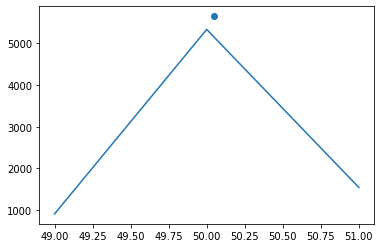

In [112]:
plt.figure()
# plt.plot([early[1], prompt[1], late[1]])
plt.plot([early[0], prompt[0], late[0]],[early[1], prompt[1], late[1]])
plt.scatter(prompt[0]+tos,y)

In [113]:
early = (49, 856.995)
prompt = (50, 6342.569)
late = (51, 249.072)
# Ts = 1
# m = (prompt[1]-early[1])/(prompt[0]- early[0])
# tos = (Ts*(late[1]-early[1]))/(2*(prompt[1]-early[1]))
# y = m*(tos) + prompt[1]
# x = prompt[0] + tos
x, y = apply_descriminator(early, prompt, late)

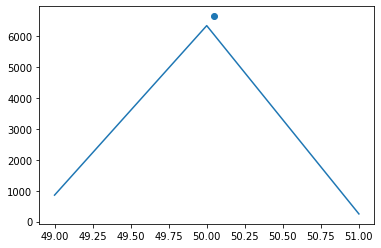

In [114]:
plt.figure()
# plt.plot([early[1], prompt[1], late[1]])
plt.plot([early[0], prompt[0], late[0]],[early[1], prompt[1], late[1]])
plt.scatter(prompt[0]+tos,y)

# Debugging

In [130]:
l1 = np.array([1,2,3,4,5])
l2 = np.array([1,2,3,4,5])
diff = l1 - l2

In [131]:
diff

array([0, 0, 0, 0, 0])

# Manual FFT


In [34]:
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y1 = np.sin(50.0 * 2.0*np.pi*x) 
y2 = 0.5*np.sin(80.0 * 2.0*np.pi*x)
y = y1+y2
yf = fft(y)
xf = fftfreq(N, T)

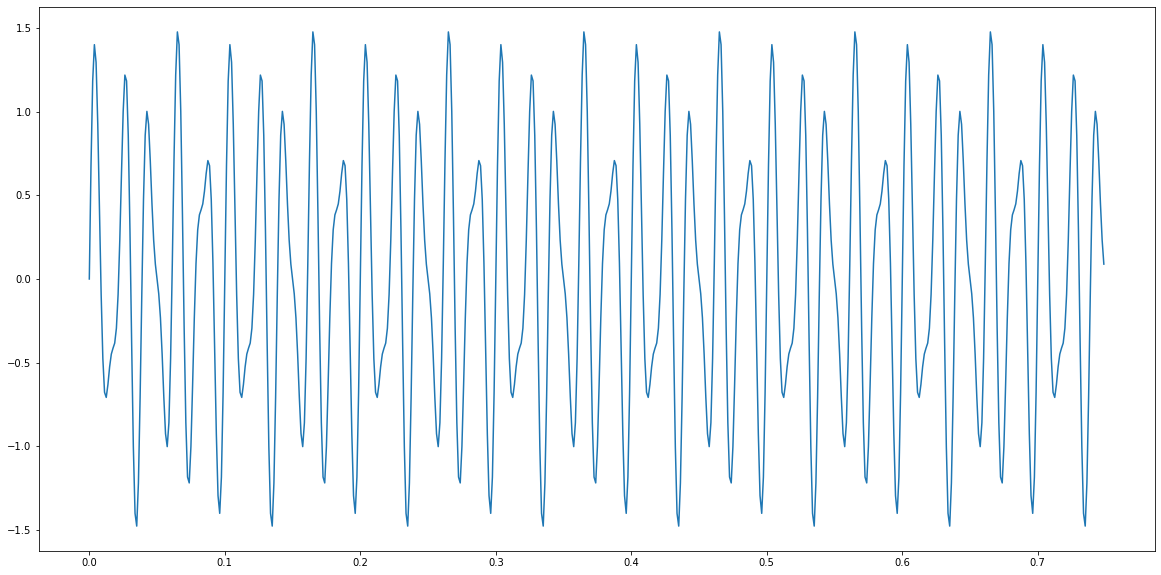

In [35]:
plt.figure(figsize=[20,10])
plt.plot(x,y)

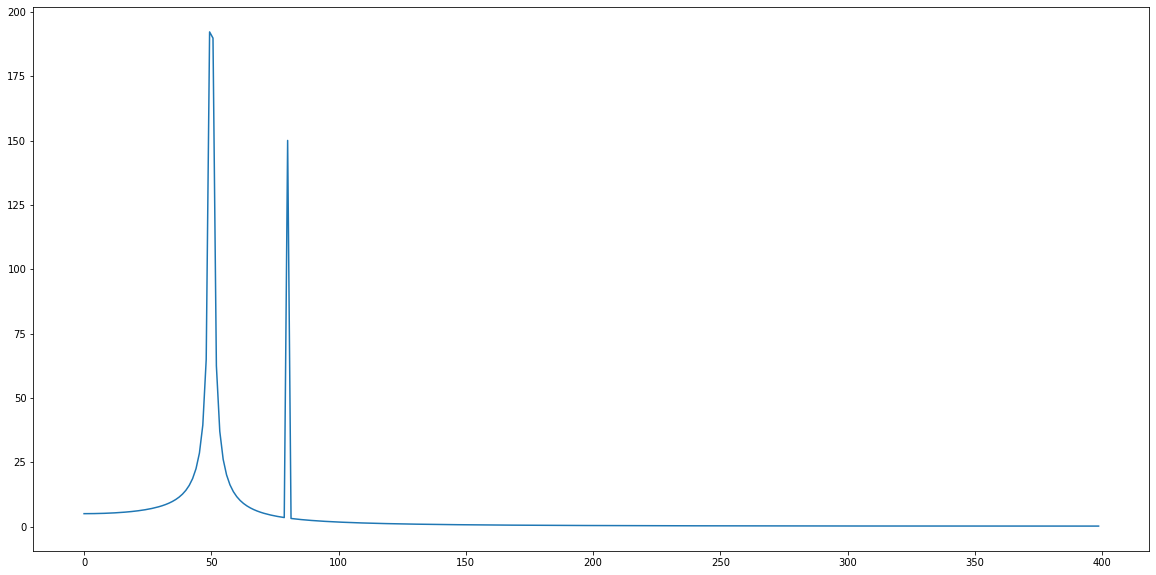

In [43]:
plt.figure(figsize=[20,10])
# xf = fftfreq(x)
# xf = fftshift(xf)
plt.plot(xf[:N//2],abs(yf[:N//2]))

In [41]:
yf

array([   5.02733949-0.00000000e+00j,    5.03096337+7.89137157e-14j,
          5.041866  -1.95283152e-13j,    5.06014111+2.13776920e-13j,
          5.08594712+2.34451946e-14j,    5.11951065+5.68565508e-14j,
          5.16113155+8.53883901e-14j,    5.21118977-7.68381252e-15j,
          5.27015425+2.78437564e-14j,    5.33859443-9.92118305e-14j,
          5.41719468-3.41393580e-14j,    5.50677261-1.26878076e-13j,
          5.60830198-1.03433162e-13j,    5.72294176-3.19720737e-14j,
          5.85207285-9.72562749e-14j,    5.99734494+6.26720897e-14j,
          6.16073675-8.75470510e-14j,    6.34463415-3.77599696e-14j,
          6.55193259-1.34908592e-14j,    6.78617288+1.15572829e-13j,
          7.05172388-5.95936031e-14j,    7.35403165+2.10604825e-14j,
          7.6999654 -6.50171756e-14j,    8.09830659+5.21734458e-14j,
          8.5604557 -6.32185752e-15j,    9.10147835+2.63177019e-14j,
          9.74169738+1.03779302e-13j,   10.50919489+4.07835278e-14j,
         11.44389452-2.39964408e-1